# **Title: Predicting A1C for Patients in Healthcare Industry**

## **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## **Import the Dataset**

In [ ]:
data = pd.read_csv("predicted data.csv")
data

,code,gender,Height,Weight,Diabetic age,Date,FBS,2h,A1C,Cr,...,Dabezid (80),VICTOZA (1.8mg),Melijent 5M,Abasaglar (0-10),Abasaglar (10-20),Abasaglar (20-30),lantus(0-10),lantus(10-20),lantus(20-30),NPH (0-10)
0,111,M,178.0,100.7,96.0,NaN,158,159,7.8,1.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,M,178.0,95.4,99.0,NaN,134,124,6.5,1.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,111,M,178.0,94.2,102.0,NaN,125,160,6.9,1.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111,M,178.0,94.9,105.0,NaN,121,172,6.7,1.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122,M,166.0,67.0,72.0,NaN,215,216,8.9,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,331,M,180.0,79.0,330.0,NaN,112,154,7.5,1.09,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,331,M,180.0,79.0,333.0,NaN,117,163,6.3,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,331,M,180.0,77.0,336.0,NaN,111,178,6.6,1.10,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,331,M,180.0,75.0,339.0,NaN,114,161,6.3,1.43,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1 = data.drop(["Date", "UA","CHO","TG","HB","Ca","TSH", "VICTOZA (1.8mg)",
                   "Abasaglar (10-20)", "Abasaglar (20-30)", "lantus(0-10)",
                   "lantus(10-20)", "lantus(20-30)", "NPH (0-10)", "Abasaglar (0-10)"], axis = 1)
data1

,code,gender,Height,Weight,Diabetic age,FBS,2h,A1C,Cr,metformin 500,...,Empagliflozin 10,Glibenclamide,Sitagliptin(ziptin 50),Sitagliptin (ziptin100),Glorenta 5/10,Glorenta 5/25,Dabezid MR (30),Dabezid MR (60),Dabezid (80),Melijent 5M
0,111,M,178.0,100.7,96.0,158,159,7.8,1.40,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,M,178.0,95.4,99.0,134,124,6.5,1.30,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,111,M,178.0,94.2,102.0,125,160,6.9,1.18,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111,M,178.0,94.9,105.0,121,172,6.7,1.27,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122,M,166.0,67.0,72.0,215,216,8.9,0.80,3.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,331,M,180.0,79.0,330.0,112,154,7.5,1.09,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
176,331,M,180.0,79.0,333.0,117,163,6.3,NaN,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
177,331,M,180.0,77.0,336.0,111,178,6.6,1.10,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
178,331,M,180.0,75.0,339.0,114,161,6.3,1.43,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


## **Expolatory Data Analysis (EDA)**

In [ ]:
df = data1.iloc[:,1:].drop("A1C", axis = 1)

In [ ]:
df.describe()

,Height,Weight,Diabetic age,FBS,2h,Cr,metformin 500,Empagliflozin 25,Empagliflozin 10,Glibenclamide,Sitagliptin(ziptin 50),Sitagliptin (ziptin100),Glorenta 5/10,Glorenta 5/25,Dabezid MR (30),Dabezid MR (60),Dabezid (80),Melijent 5M
count,125.000000,141.000000,172.000000,180.000000,180.000000,106.000000,161.000000,2.0,23.000000,30.000000,32.000000,28.000000,2.0,2.0,30.0,51.000000,14.000000,13.0
mean,168.600000,79.677305,129.098837,128.161111,185.255556,1.121038,3.198758,1.0,1.043478,1.533333,1.968750,1.071429,1.0,1.0,1.0,1.196078,2.642857,1.0
std,9.610982,11.446942,85.840983,45.995769,64.183320,0.357885,0.913919,0.0,0.208514,0.880178,0.739851,0.262265,0.0,0.0,0.0,0.400979,0.497245,0.0
min,150.000000,63.000000,5.000000,64.000000,63.000000,0.400000,1.000000,1.0,1.000000,0.500000,1.000000,1.000000,1.0,1.0,1.0,1.000000,2.000000,1.0
25%,158.000000,71.900000,72.000000,100.750000,143.000000,0.877500,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,2.000000,1.0
50%,168.000000,77.000000,106.500000,118.000000,172.000000,1.100000,4.000000,1.0,1.000000,1.000000,2.000000,1.000000,1.0,1.0,1.0,1.000000,3.000000,1.0
75%,175.000000,88.000000,173.750000,139.250000,206.250000,1.277500,4.000000,1.0,1.000000,2.000000,2.250000,1.000000,1.0,1.0,1.0,1.000000,3.000000,1.0
max,185.000000,110.000000,342.000000,326.000000,435.000000,2.100000,4.000000,1.0,2.000000,3.000000,3.000000,2.000000,1.0,1.0,1.0,2.000000,3.000000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   180 non-null    object 
 1   Height                   125 non-null    float64
 2   Weight                   141 non-null    float64
 3   Diabetic age             172 non-null    float64
 4   FBS                      180 non-null    int64  
 5   2h                       180 non-null    int64  
 6   Cr                       106 non-null    float64
 7   metformin 500            161 non-null    float64
 8   Empagliflozin 25         2 non-null      float64
 9   Empagliflozin 10         23 non-null     float64
 10  Glibenclamide            30 non-null     float64
 11  Sitagliptin(ziptin 50)   32 non-null     float64
 12  Sitagliptin (ziptin100)  28 non-null     float64
 13  Glorenta 5/10            2 non-null      float64
 14  Glorenta 5/25            2

In [ ]:
df.groupby(["gender"]).sum().iloc[:,7:]

,Empagliflozin 25,Empagliflozin 10,Glibenclamide,Sitagliptin(ziptin 50),Sitagliptin (ziptin100),Glorenta 5/10,Glorenta 5/25,Dabezid MR (30),Dabezid MR (60),Dabezid (80),Melijent 5M
gender,,,,,,,,,,,
F,1.0,5.0,32.0,53.0,16.0,0.0,0.0,22.0,27.0,0.0,4.0
M,1.0,19.0,14.0,10.0,14.0,2.0,2.0,8.0,34.0,37.0,9.0


In [ ]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '14px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '14px'),
  ('color', '#6d6d6d')]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)]

# Set colormap equal to seaborns light green color palette
cm = sns.light_palette("pink", as_cmap=True)

# Set colors and styles on DataFrame

(data1.groupby(["code", "gender"]).sum().iloc[:,7:].style
  .background_gradient(cmap=cm, subset=data1.iloc[:,9:].columns)
  .highlight_max(subset=data1.iloc[:,9:].columns)
  .format({'metformin 500': "{:}", 'Empagliflozin 25': "{:}", 'Empagliflozin 10': "{:}", 'Glibenclamide': "{:}", 'Sitagliptin(ziptin 50)': "{:}", 'Sitagliptin (ziptin100)': "{:}",
             'Glorenta 5/10': "{:}", 'Glorenta 5/25': "{:}", 'Dabezid MR (30)': "{:}", 'Dabezid MR (60)': "{:}", 'Dabezid (80)': "{:}", 'VICTOZA (1.8mg)': "{:}",
             'Melijent 5M': "{:}", 'Abasaglar (0-10)': "{:}", 'Abasaglar (10-20)': "{:}", 'Abasaglar (20-30)': "{:}", 'lantus(0-10)': "{:}", 'lantus(10-20)': "{:}",
             'lantus(20-30)': "{:}", 'NPH (0-10)': "{:}"})
  .set_table_styles(styles))

,,metformin 500,Empagliflozin 25,Empagliflozin 10,Glibenclamide,Sitagliptin(ziptin 50),Sitagliptin (ziptin100),Glorenta 5/10,Glorenta 5/25,Dabezid MR (30),Dabezid MR (60),Dabezid (80),Melijent 5M
code,gender,,,,,,,,,,,,
111,M,14.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,M,17.0,0.0,0.0,12.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
133,F,35.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,7.0,0.0,0.0
144,M,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,6.0
155,F,7.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
166,M,38.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,M,32.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0
188,M,20.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,14.0,0.0,3.0
199,M,8.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0


In [ ]:
data1.dtypes

code                         int64
gender                      object
Height                     float64
Weight                     float64
Diabetic age               float64
FBS                          int64
2h                           int64
A1C                        float64
Cr                         float64
metformin 500              float64
Empagliflozin 25           float64
Empagliflozin 10           float64
Glibenclamide              float64
Sitagliptin(ziptin 50)     float64
Sitagliptin (ziptin100)    float64
Glorenta 5/10              float64
Glorenta 5/25              float64
Dabezid MR (30)            float64
Dabezid MR (60)            float64
Dabezid (80)               float64
Melijent 5M                float64
dtype: object

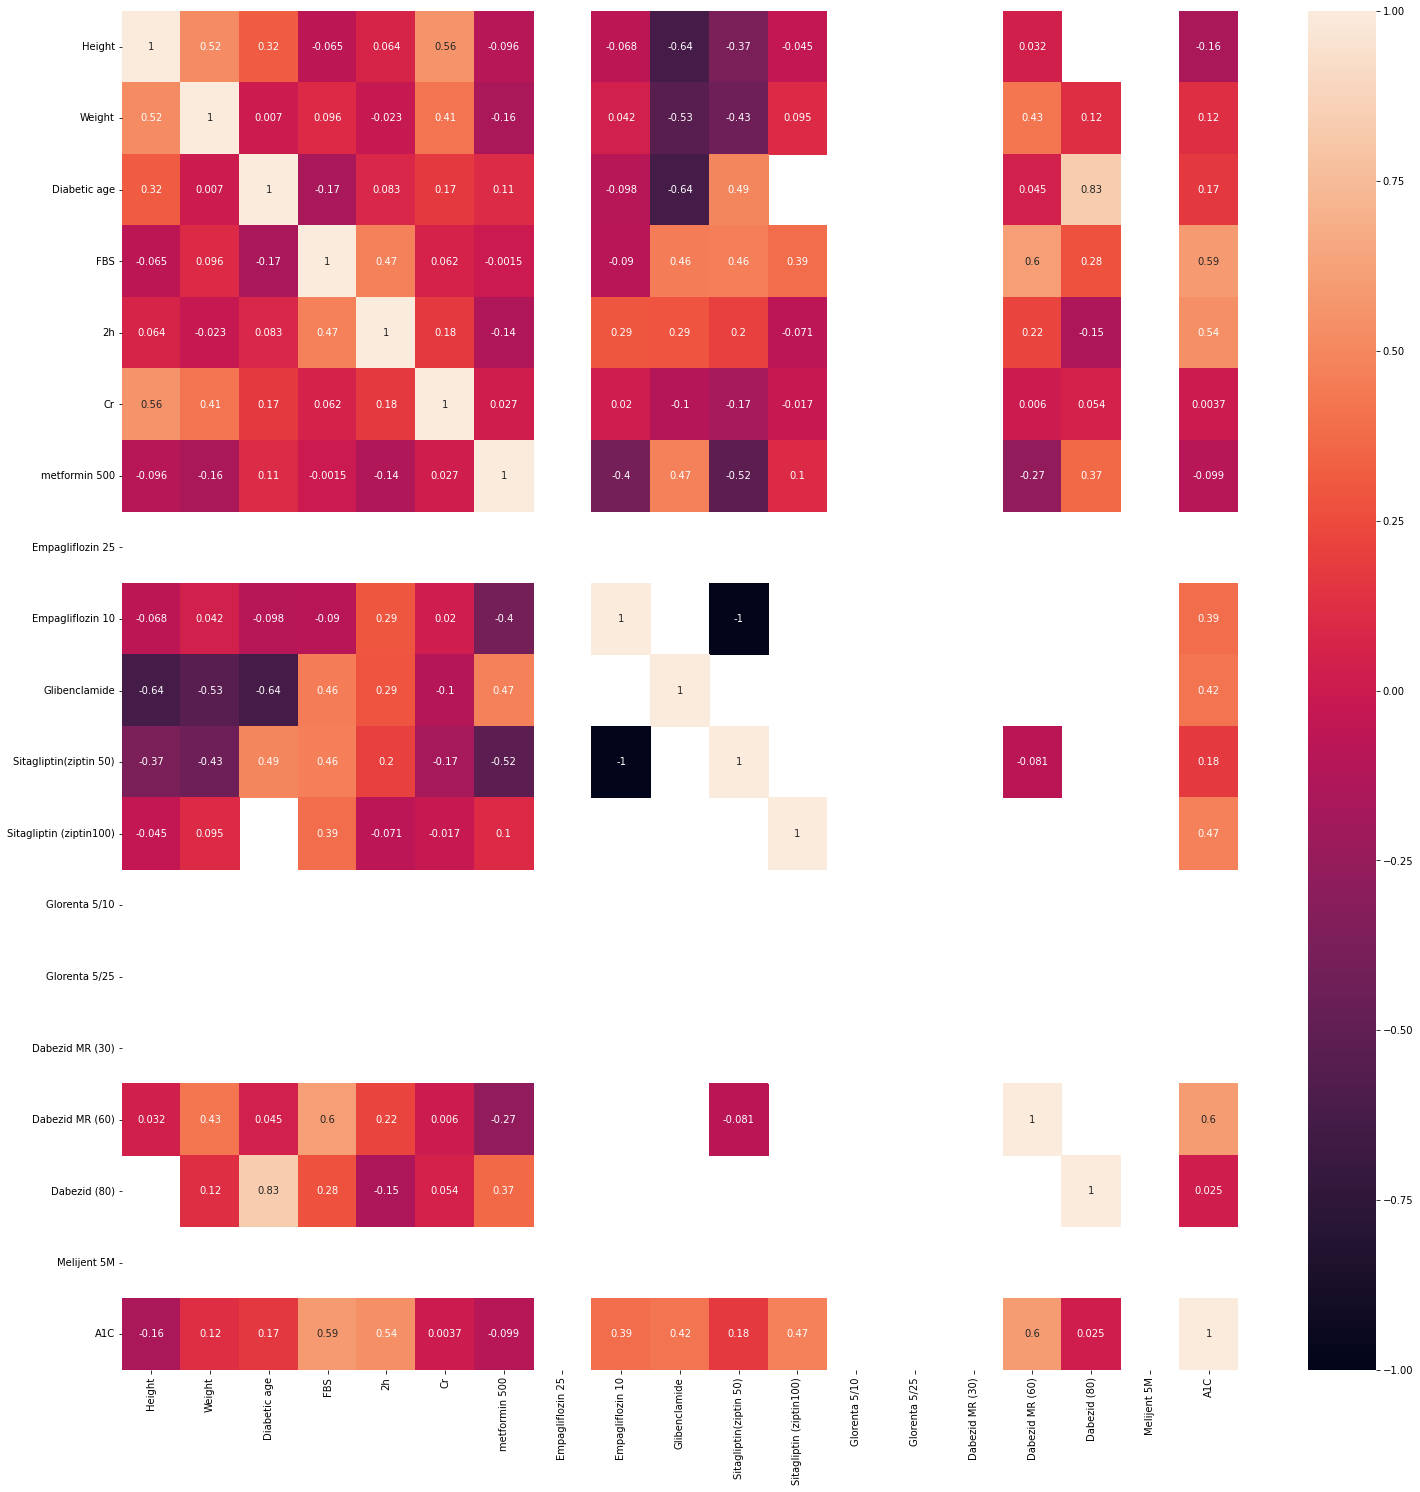

In [ ]:
d1 = data1.iloc[:,1:].drop("A1C", axis = 1)
d2 = data1.iloc[:,7]
d_t = pd.concat([d1,d2], axis = 1)

fig = plt.figure(figsize = (25,25))
sns.heatmap(d_t.corr(), vmin = -1, vmax = 1, annot = True)

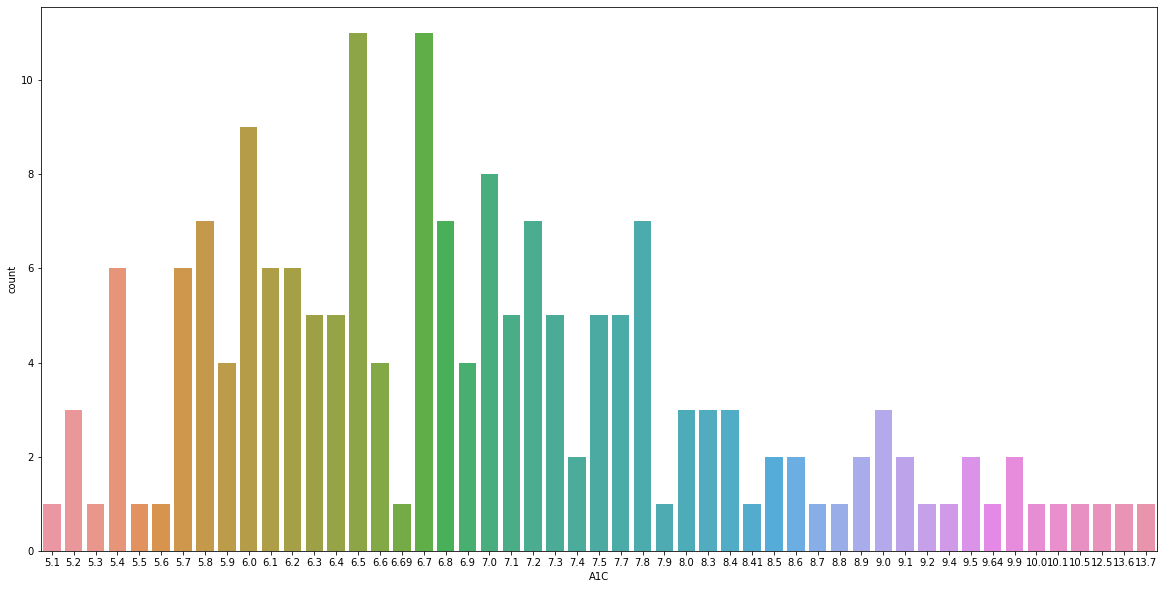

In [ ]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x = "A1C", data = data1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


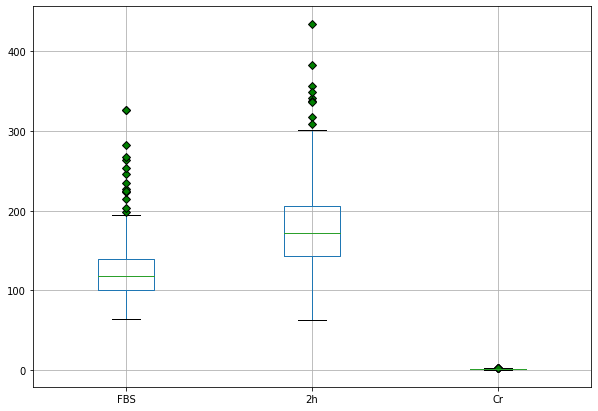

In [ ]:
fig = plt.figure(figsize = (10,7))
green_diamond = dict(markerfacecolor='g', marker='D')
data1.iloc[:,[5,6,8]].boxplot(flierprops = green_diamond)

## **Data Preparation**

### **Handle Categorical Data**

In [ ]:
data1.dtypes

code                         int64
gender                      object
Height                     float64
Weight                     float64
Diabetic age               float64
FBS                          int64
2h                           int64
A1C                        float64
Cr                         float64
metformin 500              float64
Empagliflozin 25           float64
Empagliflozin 10           float64
Glibenclamide              float64
Sitagliptin(ziptin 50)     float64
Sitagliptin (ziptin100)    float64
Glorenta 5/10              float64
Glorenta 5/25              float64
Dabezid MR (30)            float64
Dabezid MR (60)            float64
Dabezid (80)               float64
Melijent 5M                float64
dtype: object

In [ ]:
data1.gender.value_counts()

F    104
M     76
Name: gender, dtype: int64

In [ ]:
data2 = data1.replace({"gender":"F"},0).replace({"gender":"M"},1)
data2

,code,gender,Height,Weight,Diabetic age,FBS,2h,A1C,Cr,metformin 500,...,Empagliflozin 10,Glibenclamide,Sitagliptin(ziptin 50),Sitagliptin (ziptin100),Glorenta 5/10,Glorenta 5/25,Dabezid MR (30),Dabezid MR (60),Dabezid (80),Melijent 5M
0,111,1,178.0,100.7,96.0,158,159,7.8,1.40,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,1,178.0,95.4,99.0,134,124,6.5,1.30,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,111,1,178.0,94.2,102.0,125,160,6.9,1.18,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111,1,178.0,94.9,105.0,121,172,6.7,1.27,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122,1,166.0,67.0,72.0,215,216,8.9,0.80,3.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,331,1,180.0,79.0,330.0,112,154,7.5,1.09,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
176,331,1,180.0,79.0,333.0,117,163,6.3,NaN,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
177,331,1,180.0,77.0,336.0,111,178,6.6,1.10,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
178,331,1,180.0,75.0,339.0,114,161,6.3,1.43,4.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


### **Handle Missing Values**

In [ ]:
data2.isnull().sum()

code                         0
gender                       0
Height                      55
Weight                      39
Diabetic age                 8
FBS                          0
2h                           0
A1C                          0
Cr                          74
metformin 500               19
Empagliflozin 25           178
Empagliflozin 10           157
Glibenclamide              150
Sitagliptin(ziptin 50)     148
Sitagliptin (ziptin100)    152
Glorenta 5/10              178
Glorenta 5/25              178
Dabezid MR (30)            150
Dabezid MR (60)            129
Dabezid (80)               166
Melijent 5M                167
dtype: int64

In [ ]:
#Handle Missings for drugs
data3 = data2.fillna({"metformin 500" : 0, "Empagliflozin 25" : 0, "Empagliflozin 10" : 0, "Glibenclamide" : 0,
                      "Sitagliptin(ziptin 50)" : 0, "Sitagliptin (ziptin100)" : 0, "Glorenta 5/10" : 0, "Glorenta 5/25" : 0,
                      "Dabezid MR (30)" : 0, "Dabezid MR (60)" : 0, "Dabezid (80)" : 0, "Melijent 5M" : 0})

In [ ]:
df.groupby(["gender"]).mean()

,Height,Weight,Diabetic age,FBS,2h,Cr,metformin 500,Empagliflozin 25,Empagliflozin 10,Glibenclamide,Sitagliptin(ziptin 50),Sitagliptin (ziptin100),Glorenta 5/10,Glorenta 5/25,Dabezid MR (30),Dabezid MR (60),Dabezid (80),Melijent 5M
gender,,,,,,,,,,,,,,,,,,
F,161.157895,75.338462,121.432692,118.288462,181.855769,0.947255,3.108696,1.0,1.25,1.333333,2.038462,1.000000,NaN,NaN,1.0,1.080000,NaN,1.0
M,174.838235,83.388158,140.823529,141.671053,189.907895,1.282182,3.318841,1.0,1.00,2.333333,1.666667,1.166667,1.0,1.0,1.0,1.307692,2.642857,1.0


In [ ]:
#Handle Missing Values for Code 122
df_122 = data3[data3["code"] == 122].fillna({"Cr" : 0.8})

In [ ]:
#Handle Missing Values for Code 133
df_133_1 = data3[(data3["code"] == 133) & (data3["Weight"] >= 71)].fillna({"Cr" : 0.91})
df_133_2 = data3[(data3["code"] == 133) & (data3["Weight"] == 70)].fillna({"Cr" : 1})
df_133_3 = data3[(data3["code"] == 133) & (data3["Weight"] == 69.6)].fillna({"Cr" : 0.8})
df_133 = pd.concat([df_133_1, df_133_2, df_133_3], axis = 0)

In [ ]:
#Handle Missing Values for Code 144
df_144 = data3[data3["code"] == 144].fillna({"Cr" : 1.45})

In [ ]:
#Handle Missing Values for Code 155
df_155 = data3[data3["code"] == 155].fillna({"Height" : 161,
                                             "Cr" : 0.4})               ##number 161 means the average of Females Height totatlly in our data

In [ ]:
#Handle Missing Values for Code 166
df_166 = data3[data3["code"] == 166].fillna({"Cr" : 1.1})

In [ ]:
#Handle Missing Values for Code 177
df_177 = data3[data3["code"] == 177].fillna({"Diabetic age" : 141,
                                             "Cr" : 1})                 ##number 141 means the average of Males Diabetic age totatlly in our data

In [ ]:
#Handle Missing Values for Code 188
df_188 = data3[data3["code"] == 188].fillna({"Height" : 175})          ##number 175 means the average of Males Height totatlly in our data

In [ ]:
#Handle Missing Values for Code 199
df_199 = data3[data3["code"] == 199].fillna({"Cr" : 1})

In [ ]:
#Handle Missing Values for Code 210
df_210 = data3[data3["code"] == 210].fillna({"Cr" : 0.75})

In [ ]:
#Handle Missing Values for Code 221
df_221_1 = data3[(data3["code"] == 221) & (data3["Diabetic age"] <= 78)].fillna({"Cr" : 0.4})
df_221_2 = data3[(data3["code"] == 221) & (data3["Diabetic age"] > 80)].fillna({"Cr" : 0.83})
df_221 = pd.concat([df_221_1, df_221_2], axis = 0)

In [ ]:
#Handle Missing Values for Code 232
df_232_1 = data3[(data3["code"] == 232) & (data3["Diabetic age"] < 80)].fillna({"Cr" : 0.81})
df_232_2 = data3[(data3["code"] == 232) & (data3["Diabetic age"] > 80)].fillna({"Cr" : 1})
df_232 = pd.concat([df_232_1, df_232_2], axis = 0)

In [ ]:
#Handle Missing Values for Code 243
df_243 = data3[data3["code"] == 243].fillna({"Cr" : 1.16})

In [ ]:
#Handle Missing Values for Code 254
df_254_1 = data3[(data3["code"] == 254) & (data3["Diabetic age"] < 129)].fillna({"Cr" : 0.86})
df_254_2 = data3[(data3["code"] == 254) & (data3["Diabetic age"] >= 129)].fillna({"Cr" : 0.92})
df_254 = pd.concat([df_254_1, df_254_2], axis = 0)

In [ ]:
#Handle Missing Values for Code 265
df_265 = data3[data3["code"] == 265].fillna({"Cr" : 0.72})

In [ ]:
#Handle Missing Values for Code 287
df_287 = data3[data3["code"] == 287].fillna({"Cr" : 0.7})

In [ ]:
#Handle Missing Values for Code 298
df_298_1 = data3[data3["code"] == 298].fillna({"Height" : 161,
                                             "Weight" : 69.2})

df_298_2 = df_298_1[df_298_1["Diabetic age"] <= 141].fillna({"Cr" : 0.8})
df_298_3 = df_298_1[(df_298_1["Diabetic age"] > 141) & (df_298_1["Diabetic age"] <= 150)].fillna({"Cr" : 0.9})
df_298_4 = df_298_1[(df_298_1["Diabetic age"] > 150) & (df_298_1["Diabetic age"] <= 159)].fillna({"Cr" : 1})
df_298_5 = df_298_1[(df_298_1["Diabetic age"] > 159) & (df_298_1["Diabetic age"] <= 170)].fillna({"Cr" : 0.9})
df_298_6 = df_298_1[(df_298_1["Diabetic age"] > 170) & (df_298_1["Diabetic age"] <= 205)].fillna({"Cr" : 0.5})
df_298_7 = df_298_1[df_298_1["Diabetic age"] > 205].fillna({"Cr" : 1})

df_298 = pd.concat([df_298_2, df_298_3, df_298_4, df_298_5, df_298_6, df_298_7], axis = 0)

In [ ]:
#Handle Missing Values for Code 309
df_309_1 = data3[data3["code"] == 309].fillna({"Height" : 161,
                                             "Weight" : 75})

df_309_2 = df_309_1[(df_309_1["Diabetic age"] >= 60) & (df_309_1["Diabetic age"] < 75)].fillna({"Cr" : 0.6})
df_309_3 = df_309_1[df_309_1["Diabetic age"] >= 75].fillna({"Cr" : 0.8})

df_309 = pd.concat([df_309_2, df_309_3], axis = 0)

In [ ]:
#Handle Missing Values for Code 320
df_320 = data3[data3["code"] == 320].fillna({"Cr" : 1.15})

In [ ]:
#Handle Missing Values for Code 331
df_331_1 = data3[(data3["code"] == 331) & (data3["Diabetic age"] >= 300) & (data3["Diabetic age"] < 330)].fillna({"Cr" : 1.16})
df_331_2 = data3[(data3["code"] == 331) & (data3["Diabetic age"] >= 330)].fillna({"Cr" : 1.09})

df_331 = pd.concat([df_331_1, df_331_2], axis = 0)

In [ ]:
#Smaples without Missing values (for the aim of concatenating)
df_111 = data3[(data3["code"] == 111)]
df_276 = data3[(data3["code"] == 276)]

In [ ]:
#Finalization
data4 = (pd.concat([df_111, df_122, df_133, df_144, df_155, df_166, df_177, df_188, df_199, 
                    df_210, df_221, df_232, df_243, df_254, df_265, df_276, df_287,df_298,df_309,df_320,df_331], axis = 0)
          .reset_index()
          .drop("index", axis = 1))

In [ ]:
data4.shape

(180, 21)

In [ ]:
data4.isnull().sum()

code                       0
gender                     0
Height                     0
Weight                     0
Diabetic age               0
FBS                        0
2h                         0
A1C                        0
Cr                         0
metformin 500              0
Empagliflozin 25           0
Empagliflozin 10           0
Glibenclamide              0
Sitagliptin(ziptin 50)     0
Sitagliptin (ziptin100)    0
Glorenta 5/10              0
Glorenta 5/25              0
Dabezid MR (30)            0
Dabezid MR (60)            0
Dabezid (80)               0
Melijent 5M                0
dtype: int64

### **Handle Outliers**

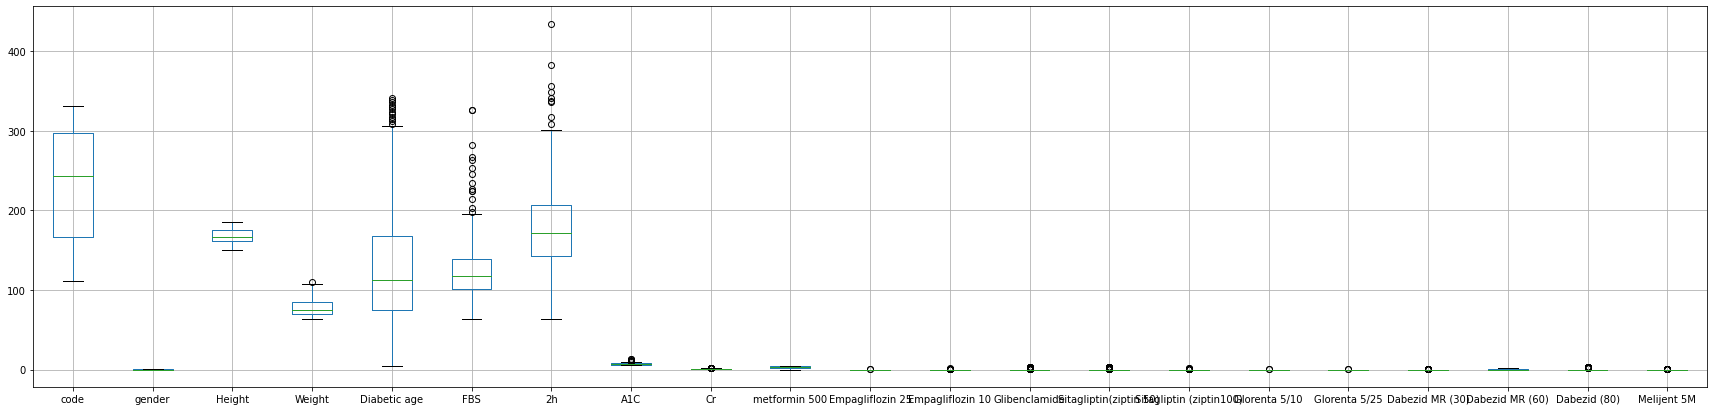

In [ ]:
fig = plt.figure(figsize = (30,7))
data4.boxplot()

Due to having a real Dataset, and also for the reason of low volume Dataset, we can not consider any Outliers. In fact, we will real results in the end.

### **Handle Duplicated Data**

In [ ]:
data4.duplicated().sum()

0

We have no duplicates. However, if we have it, we will not consider it

In this Dataset, Duplicate Data is **meaningless**

### **Feature Scaling**

In [ ]:
data5_1 = data4.drop("A1C", axis = 1)
data5_2 = data4.iloc[:,7]
data6 = pd.concat([data5_1, data5_2], axis = 1)

In [ ]:
data7 = data6.drop("code", axis = 1)

In [ ]:
data7.columns

Index(['gender', 'Height', 'Weight', 'Diabetic age', 'FBS', '2h', 'Cr',
       'metformin 500', 'Empagliflozin 25', 'Empagliflozin 10',
       'Glibenclamide', 'Sitagliptin(ziptin 50)', 'Sitagliptin (ziptin100)',
       'Glorenta 5/10', 'Glorenta 5/25', 'Dabezid MR (30)', 'Dabezid MR (60)',
       'Dabezid (80)', 'Melijent 5M', 'A1C'],
      dtype='object')

In [ ]:
#Separating variables into Main, binary, and target variable
X = data7.iloc[:, 1:-1]
binary = data7.iloc[:,0]
Y = data7.iloc[:,-1]

**MinMax Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

In [ ]:
X_mm_df = pd.DataFrame(X_mm, columns = X.columns)
df_mm = pd.concat([binary, X_mm_df, Y], axis = 1)

**Standard Scaler (Standardization)**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
X_sc_df = pd.DataFrame(X_sc, columns = X.columns)
df_sc = pd.concat([binary, X_sc_df, Y], axis = 1)

## **Splitting the Dataset into the Training set and the Test set**

**With Scaling**

In [ ]:
X_m = df_mm.iloc[:,:-1]
Y_m = df_mm.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size = 0.3, random_state = 0)

In [ ]:
X_s = df_sc.iloc[:,:-1]
Y_s = df_sc.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_s, Y_s, test_size = 0.3, random_state = 0)

**Without Scaling**

In [ ]:
X1 = data7.iloc[:,:-1]
Y1 = data7.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 0)

## **Training the Regression models on the Training set**

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# grid search hyperparameters for the LinearRegression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = LinearRegression()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

## define grid
grid = dict()
grid["fit_intercept"] = [True , False]

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X_train_m, Y_train_m)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.750
Config: {'fit_intercept': True}


In [ ]:
regr_model = LinearRegression(fit_intercept = True)

In [ ]:
regr_model.fit(X_train_m, Y_train_m)

LinearRegression()

In [ ]:
pred_regr = regr_model.predict(X_test_m)

### **LGBM Regressor**

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# grid search hyperparameters for the LGBMRegressor
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = LGBMRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['boosting_type'] = ["gbdt", "dart", "goss", "rf"]
grid['num_leaves'] = [7, 14, 21, 28, 31, 50]
grid['learning_rate'] = [0.1, 0.03, 0.003]
grid['max_depth'] = [j for j in range(-1,26)]
grid['n_estimators'] = [50, 100, 200, 500]

# define search
search = GridSearchCV(model, grid, scoring= 'neg_mean_absolute_error', cv=5, n_jobs=-1)

# perform the search
results = search.fit(X_train , Y_train)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
LGBM_model = LGBMRegressor(boosting_type = 'dart', learning_rate = 0.1, max_depth = 3, n_estimators = 500, num_leaves = 7 )

In [ ]:
LGBM_model.fit(X_train, Y_train)

LGBMRegressor(boosting_type='dart', max_depth=3, n_estimators=500, num_leaves=7)

In [ ]:
pred_LGBM = LGBM_model.predict(X_test)

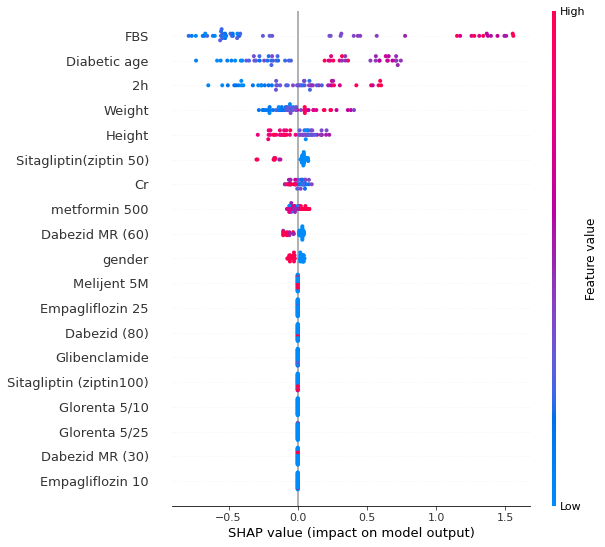

In [ ]:
explainer = shap.TreeExplainer(LGBM_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = data7.columns)

### **XGBoost Regressor**

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
# grid search hyperparameters for the XGBRegressor
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = XGBRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid["learning_rate"] = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
grid["max_depth"] = [ 3, 4, 5, 6 , 7 , 8 , 9 , 10]
grid["min_child_weight"] = [ 1, 3, 5, 7 ]
grid["gamma"] = [ 0.0, 0.1, 0.2 , 0.3, 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]
grid["colsample_bytree"] = [ 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=3, verbose=0, n_jobs=-1)

# perform the search
results = search.fit(X_train, Y_train)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
XGB_model = XGBRegressor(colsample_bytree = 0.8, gamma = 0.0, learning_rate= 0.3, max_depth= 4, min_child_weight= 1)

In [ ]:
XGB_model.fit(X_train, Y_train)

[15:01:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, gamma=0.0, learning_rate=0.3, max_depth=4)

In [ ]:
pred_XGB = XGB_model.predict(X_test)

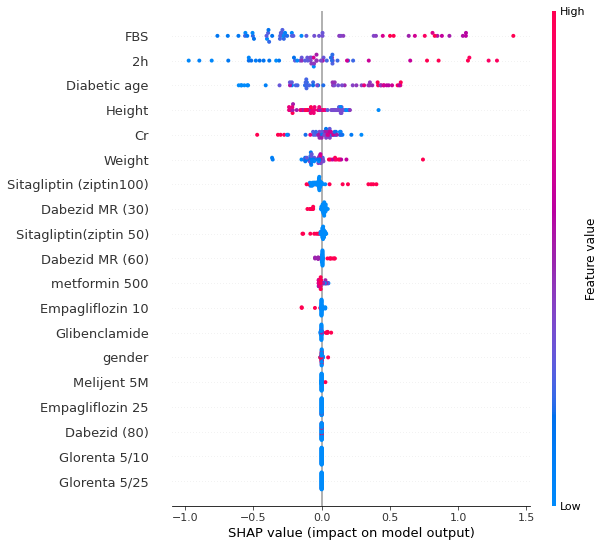

In [ ]:
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = data7.columns)

### **CatBoost Regressor**

**Training the Model**

In [ ]:
!pip install catboost

In [ ]:
import catboost as cb

In [ ]:
train_dataset = cb.Pool(X_train, Y_train) 
test_dataset = cb.Pool(X_test, Y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
6:	learn: 5.8193173	test: 6.5076004	best: 6.5076004 (6)	total: 16.2ms	remaining: 446ms
7:	learn: 5.6663999	test: 6.3667907	best: 6.3667907 (7)	total: 17.8ms	remaining: 428ms
8:	learn: 5.5095859	test: 6.2143127	best: 6.2143127 (8)	total: 18.7ms	remaining: 398ms
9:	learn: 5.3613209	test: 6.0716941	best: 6.0716941 (9)	total: 22.7ms	remaining: 431ms
10:	learn: 5.2249429	test: 5.9473557	best: 5.9473557 (10)	total: 24.3ms	remaining: 418ms
11:	learn: 5.0772218	test: 5.8042720	best: 5.8042720 (11)	total: 24.7ms	remaining: 387ms
12:	learn: 4.9518485	test: 5.6877413	best: 5.6877413 (12)	total: 26.3ms	remaining: 378ms
13:	learn: 4.8352074	test: 5.5884548	best: 5.5884548 (13)	total: 38.5ms	remaining: 512ms
14:	learn: 4.7142188	test: 5.4666440	best: 5.4666440 (14)	total: 40.3ms	remaining: 497ms
15:	learn: 4.5895251	test: 5.3611351	best: 5.3611351 (15)	total: 41.8ms	remaining: 481ms
16:	learn: 4.4759451	test: 5.2485791	best: 5.2485791 (16)	total: 44

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

**Testing the Model**

In [ ]:
pred_cat = model.predict(X_test)

**Visualizing Feature Importance**

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.6 MB/s 


In [ ]:
from sklearn.inspection import permutation_importance
import shap

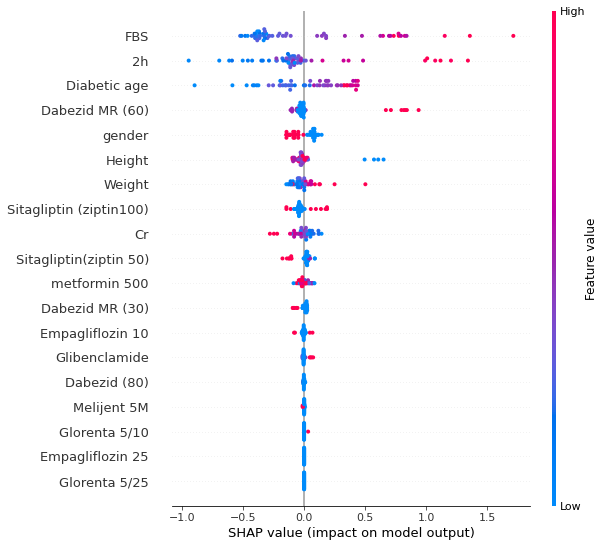

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = data7.columns)

### **Stochastic Gradient Descent Regressor**

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# grid search hyperparameters for the Stochastic Gradient Descent
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = SGDRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['penalty'] = ["l2","l1","elasticnet"]

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_s, Y_train_s)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
sgdr_model = SGDRegressor(alpha = 0.1, penalty='l1')

In [ ]:
sgdr_model.fit(X_train_s, Y_train_s)

SGDRegressor(alpha=0.1, penalty='l1')

In [ ]:
pred_sgdr = sgdr_model.predict(X_test_s)

### **Kernel Ridge Regression**

In [ ]:
from sklearn.kernel_ridge import KernelRidge

In [ ]:
# grid search hyperparameters for the Kernel Ridge
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = KernelRidge()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0]

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_m, Y_train_m)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
krr_model = KernelRidge(alpha=1.0, kernel = "linear")

In [ ]:
krr_model.fit(X_train_m, Y_train_m)

In [ ]:
pred_krr = krr_model.predict(X_test_m)

### **Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# grid search hyperparameters for the elastic net
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

# define model
model = ElasticNet()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0]
grid['l1_ratio'] = arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_m, Y_train_m)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
elas_model = ElasticNet(alpha=0.01, l1_ratio=0.9)

In [ ]:
elas_model.fit(X_train_m, Y_train_m)

In [ ]:
pred_elas = elas_model.predict(X_test_m)

### **Bayesian Ridge Regression**

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
# grid search hyperparameters for the Bayesian Ridge Regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


# define model
model = BayesianRidge()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha_1'] = [1e-6,1e-5,1e-4,1e-3]
grid['alpha_2']=[1e-6,1e-5,1e-4,1e-3]
grid['lambda_1']=[1e-6,1e-5,1e-4,1e-3]
grid['lambda_2']=[1e-6,1e-5,1e-4,1e-3]
grid['tol']=[1e-6,1e-5,1e-4,1e-3,1e-2]

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_s, Y_train_s)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


In [ ]:
BRR_model = BayesianRidge(alpha_1= 1e-06, alpha_2= 0.001, lambda_1= 0.001, lambda_2= 1e-06, tol= 1e-06)

In [ ]:
BRR_model.fit(X_train_s, Y_train_s)

In [ ]:
pred_BRR = BRR_model.predict(X_test_s)

### **Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# grid search hyperparameters for the Gradient Boosting Regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# define model
model = GradientBoostingRegressor(subsample=0.8)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['max_depth'] = range(2,15)
grid['criterion']=['friedman_mse', 'squared_error', 'mse', 'mae']
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train, Y_train)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
GBR_model =GradientBoostingRegressor (max_depth=5, criterion="mse", subsample=0.8 )

In [ ]:
GBR_model.fit(X_train, Y_train)

In [ ]:
pred_GBR = GBR_model.predict(X_test)

In [ ]:
explainer = shap.TreeExplainer(GBR_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = data7.columns)

### **Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR

In [ ]:
# grid search hyperparameters for the Support Vector Regressor
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = SVR()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['kernel'] =['linear', 'poly', 'rbf', 'sigmoid']
grid['degree']=range(2,10)
grid['C']=range(2,10)
grid['epsilon']=arange(0.1,1,0.1)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_s, Y_train_s)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
SVR_model=SVR(kernel="rbf", C=4, degree=2,epsilon=0.1)

In [ ]:
SVR_model.fit(X_train_s, Y_train_s)

In [ ]:
pred_SVR = SVR_model.predict(X_test_s)

## **Algorithms Evaluation methods**

### **For Linear Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn

#MSE: Mean Squared Error
MSE_regr = mean_squared_error(Y_test_m, pred_regr)

#RMSE: Root Means Squared Error
RMSE_regr = np.sqrt(MSE_regr)

#RMSLE: Root Mean Squared Log Error
RMSLE_regr = np.sqrt(mean_squared_log_error(Y_test_m, pred_regr))

#MAE: Mean Absolute Error
MAE_regr = mean_absolute_error(Y_test_m, pred_regr)

#MAPE: Mean Absolute Percentage Error
MAPE_regr = mean_absolute_percentage_error(Y_test_m, pred_regr)

#R² Score
R2_regr = r2_score(Y_test_m, pred_regr)

#Adjusted R² Score
Adjusted_R2_regr = 1 - ((1-(R2_regr ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_regr = sklearn.metrics.mean_pinball_loss(Y_test_m, pred_regr, alpha=0.1)

#Finalization
Linear_Regression_data = {"MSE": MSE_regr, 
      "RMSE": RMSE_regr,
      "MAE": MAE_regr,
      "MAPE": MAPE_regr, 
      "R² Score":R2_regr, 
      "Adjusted R² Score" :Adjusted_R2_regr , 
      "MPL":MPL_regr}
Linear_Regression = pd.DataFrame(Linear_Regression_data, index = ["Linear Regression"])
Linear_Regression

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
Linear Regression,1.423205,1.192981,0.799691,0.104273,0.294158,-0.42394,0.33216


### **For LGBM Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_LGBM = mean_squared_error(Y_test, pred_LGBM)

#RMSE: Root Means Squared Error
RMSE_LGBM = np.sqrt(MSE_LGBM)

#RMSLE: Root Mean Squared Log Error
RMSLE_LGBM = np.sqrt(mean_squared_log_error(Y_test, pred_LGBM))

#MAE: Mean Absolute Error
MAE_LGBM = mean_absolute_error(Y_test, pred_LGBM)

#MAPE: Mean Absolute Percentage Error
MAPE_LGBM = mean_absolute_percentage_error(Y_test, pred_LGBM)

#R² Score
R2_LGBM = r2_score(Y_test, pred_LGBM)

#Adjusted R² Score
Adjusted_R2_LGBM = 1 - ((1-(R2_LGBM ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_LGBM = mean_pinball_loss(Y_test, pred_LGBM, alpha=0.1)

#Finalization
LGBM_data = {"MSE": MSE_LGBM, 
      "RMSE": RMSE_LGBM,
      "MAE": MAE_LGBM,
      "MAPE": MAPE_LGBM, 
      "R² Score":R2_LGBM, 
      "Adjusted R² Score" :Adjusted_R2_LGBM , 
      "MPL":MPL_LGBM}
LGBM = pd.DataFrame(LGBM_data, index = ["LGBM"])
LGBM

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
LGBM,1.481087,1.216999,0.834853,0.108614,0.265451,-0.448982,0.345173


### **For XGBoost Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_XGB = mean_squared_error(Y_test, pred_XGB)

#RMSE: Root Means Squared Error
RMSE_XGB = np.sqrt(MSE_XGB)

#RMSLE: Root Mean Squared Log Error
RMSLE_XGB = np.sqrt(mean_squared_log_error(Y_test, pred_XGB))

#MAE: Mean Absolute Error
MAE_XGB = mean_absolute_error(Y_test, pred_XGB)

#MAPE: Mean Absolute Percentage Error
MAPE_XGB = mean_absolute_percentage_error(Y_test, pred_XGB)

#R² Score
R2_XGB = r2_score(Y_test, pred_XGB)

#Adjusted R² Score
Adjusted_R2_XGB = 1 - ((1-(R2_XGB ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_XGB = mean_pinball_loss(Y_test, pred_XGB, alpha=0.1)

#Finalization
XGB_data = {"MSE": MSE_XGB, 
      "RMSE": RMSE_XGB,
      "MAE": MAE_XGB,
      "MAPE": MAPE_XGB, 
      "R² Score":R2_XGB, 
      "Adjusted R² Score" :Adjusted_R2_XGB , 
      "MPL":MPL_XGB}
XGB = pd.DataFrame(XGB_data, index = ["XGB"])
XGB

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
XGB,1.194778,1.093059,0.756979,0.09814,0.407447,-0.300038,0.307378


### **For CatBoost Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_CAT = mean_squared_error(Y_test, pred_cat)

#RMSE: Root Means Squared Error
RMSE_CAT = np.sqrt(MSE_CAT)

#RMSLE: Root Mean Squared Log Error
RMSLE_CAT = np.sqrt(mean_squared_log_error(Y_test, pred_cat))

#MAE: Mean Absolute Error
MAE_CAT = mean_absolute_error(Y_test, pred_cat)

#MAPE: Mean Absolute Percentage Error
MAPE_CAT = mean_absolute_percentage_error(Y_test, pred_cat)

#R² Score
R2_CAT = r2_score(Y_test, pred_cat)

#Adjusted R² Score
Adjusted_R2_CAT = 1 - ((1-(R2_CAT ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_CAT = mean_pinball_loss(Y_test, pred_cat, alpha=0.1)

#Finalization
CAT_data = {"MSE": MSE_CAT, 
      "RMSE": RMSE_CAT,
      "MAE": MAE_CAT,
      "MAPE": MAPE_CAT, 
      "R² Score":R2_CAT, 
      "Adjusted R² Score" :Adjusted_R2_CAT , 
      "MPL":MPL_CAT}
CATB = pd.DataFrame(CAT_data, index = ["CATBoost"])
CATB

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
CATBoost,0.940207,0.969642,0.67599,0.088884,0.533702,-0.114811,0.278897


### **For Stochastic Gradient Descent Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_sgdr = mean_squared_error(Y_test_s, pred_sgdr)

#RMSE: Root Means Squared Error
RMSE_sgdr = np.sqrt(MSE_sgdr)

#RMSLE: Root Mean Squared Log Error
RMSLE_sgdr = np.sqrt(mean_squared_log_error(Y_test_s, pred_sgdr))

#MAE: Mean Absolute Error
MAE_sgdr = mean_absolute_error(Y_test_s, pred_sgdr)

#MAPE: Mean Absolute Percentage Error
MAPE_sgdr = mean_absolute_percentage_error(Y_test_s, pred_sgdr)

#R² Score
R2_sgdr = r2_score(Y_test_s, pred_sgdr)

#Adjusted R² Score
Adjusted_R2_sgdr = 1 - ((1-(R2_sgdr ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_sgdr = mean_pinball_loss(Y_test_s, pred_sgdr, alpha=0.1)

#Finalization
sgdr_data = {"MSE": MSE_sgdr, 
      "RMSE": RMSE_sgdr,
      "MAE": MAE_sgdr,
      "MAPE": MAPE_sgdr, 
      "R² Score":R2_sgdr, 
      "Adjusted R² Score" :Adjusted_R2_sgdr , 
      "MPL":MPL_sgdr}
sgdr = pd.DataFrame(sgdr_data, index = ["SGDR"])
sgdr

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
SGDR,1.456677,1.206929,0.824792,0.1048,0.277558,-0.438735,0.294058


### **For Kernel Ridge Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_krr = mean_squared_error(Y_test_m, pred_krr)

#RMSE: Root Means Squared Error
RMSE_krr = np.sqrt(MSE_krr)

#RMSLE: Root Mean Squared Log Error
RMSLE_krr = np.sqrt(mean_squared_log_error(Y_test_m, pred_krr))

#MAE: Mean Absolute Error
MAE_krr = mean_absolute_error(Y_test_m, pred_krr)

#MAPE: Mean Absolute Percentage Error
MAPE_krr = mean_absolute_percentage_error(Y_test_m, pred_krr)

#R² Score
R2_krr = r2_score(Y_test_m, pred_krr)

#Adjusted R² Score
Adjusted_R2_krr = 1 - ((1-(R2_krr ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_krr = mean_pinball_loss(Y_test_m, pred_krr, alpha=0.1)

#Finalization
KRR_data = {"MSE": MSE_krr, 
      "RMSE": RMSE_krr,
      "MAE": MAE_krr,
      "MAPE": MAPE_krr, 
      "R² Score":R2_krr, 
      "Adjusted R² Score" :Adjusted_R2_krr , 
      "MPL":MPL_krr}
KRR = pd.DataFrame(KRR_data, index = ["KRR"])
KRR

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
KRR,2.56147,1.600459,1.200203,0.164798,-0.270367,-0.444876,0.350016


### **For Elastic Net Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_elas = mean_squared_error(Y_test_m, pred_elas)

#RMSE: Root Means Squared Error
RMSE_elas = np.sqrt(MSE_elas)

#RMSLE: Root Mean Squared Log Error
RMSLE_elas = np.sqrt(mean_squared_log_error(Y_test_m, pred_elas))

#MAE: Mean Absolute Error
MAE_elas = mean_absolute_error(Y_test_m, pred_elas)

#MAPE: Mean Absolute Percentage Error
MAPE_elas = mean_absolute_percentage_error(Y_test_m, pred_elas)

#R² Score
R2_elas = r2_score(Y_test_m, pred_elas)

#Adjusted R² Score
Adjusted_R2_elas = 1 - ((1-(R2_elas ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_elas = mean_pinball_loss(Y_test_m, pred_elas, alpha=0.1)

#Finalization
ELASNET_data = {"MSE": MSE_elas, 
      "RMSE": RMSE_elas,
      "MAE": MAE_elas,
      "MAPE": MAPE_elas, 
      "R² Score":R2_elas, 
      "Adjusted R² Score" :Adjusted_R2_elas , 
      "MPL":MPL_elas}
Elas = pd.DataFrame(ELASNET_data, index = ["ElasticNet"])
Elas

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
ElasticNet,1.37674,1.173346,0.801882,0.103276,0.317203,-0.401979,0.312578


### **For Bayesian Ridge Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_BRR = mean_squared_error(Y_test_s, pred_BRR)

#RMSE: Root Means Squared Error
RMSE_BRR = np.sqrt(MSE_BRR)

#RMSLE: Root Mean Squared Log Error
RMSLE_BRR = np.sqrt(mean_squared_log_error(Y_test_s, pred_BRR))

#MAE: Mean Absolute Error
MAE_BRR = mean_absolute_error(Y_test_s, pred_BRR)

#MAPE: Mean Absolute Percentage Error
MAPE_BRR = mean_absolute_percentage_error(Y_test_s, pred_BRR)

#R² Score
R2_BRR = r2_score(Y_test_s, pred_BRR)

#Adjusted R² Score
Adjusted_R2_BRR = 1 - ((1-(R2_BRR ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_BRR = mean_pinball_loss(Y_test_s, pred_BRR, alpha=0.1)

#Finalization
BRR_data = {"MSE": MSE_BRR, 
      "RMSE": RMSE_BRR,
      "MAE": MAE_BRR,
      "MAPE": MAPE_BRR, 
      "R² Score":R2_BRR, 
      "Adjusted R² Score" :Adjusted_R2_BRR , 
      "MPL":MPL_BRR}
BRR = pd.DataFrame(BRR_data, index = ["BayesianRidgeRegression"])
BRR

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
BayesianRidgeRegression,1.383196,1.176094,0.790672,0.102532,0.314001,-0.405129,0.32391


### **For Gradient Boosting Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_GBR = mean_squared_error(Y_test, pred_GBR)

#RMSE: Root Means Squared Error
RMSE_GBR = np.sqrt(MSE_GBR)

#RMSLE: Root Mean Squared Log Error
RMSLE_GBR = np.sqrt(mean_squared_log_error(Y_test, pred_GBR))

#MAE: Mean Absolute Error
MAE_GBR = mean_absolute_error(Y_test, pred_GBR)

#MAPE: Mean Absolute Percentage Error
MAPE_GBR = mean_absolute_percentage_error(Y_test, pred_GBR)

#R² Score
R2_GBR = r2_score(Y_test, pred_GBR)

#Adjusted R² Score
Adjusted_R2_GBR = 1 - ((1-(R2_GBR ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_GBR = mean_pinball_loss(Y_test, pred_GBR, alpha=0.1)

#Finalization
GBR_data = {"MSE": MSE_GBR, 
      "RMSE": RMSE_GBR,
      "MAE": MAE_GBR,
      "MAPE": MAPE_GBR, 
      "R² Score":R2_GBR, 
      "Adjusted R² Score" :Adjusted_R2_GBR , 
      "MPL":MPL_GBR}
GBR = pd.DataFrame(GBR_data, index = ["GBR"])
GBR

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
GBR,1.271175,1.127464,0.800033,0.103784,0.369558,-0.34593,0.31844


### **For Support Vector Regression**

In [ ]:
#Related Libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_pinball_loss
import sklearn

#MSE: Mean Squared Error
MSE_SVR = mean_squared_error(Y_test_s, pred_SVR)

#RMSE: Root Means Squared Error
RMSE_SVR = np.sqrt(MSE_SVR)

#RMSLE: Root Mean Squared Log Error
RMSLE_SVR = np.sqrt(mean_squared_log_error(Y_test_s, pred_SVR))

#MAE: Mean Absolute Error
MAE_SVR = mean_absolute_error(Y_test_s, pred_SVR)

#MAPE: Mean Absolute Percentage Error
MAPE_SVR = mean_absolute_percentage_error(Y_test_s, pred_SVR)

#R² Score
R2_SVR = r2_score(Y_test_s, pred_SVR)

#Adjusted R² Score
Adjusted_R2_SVR = 1 - ((1-(R2_SVR ** 2)) * (54-1) / (54-19-1))

#MPL: Mean Pinball Loss
MPL_SVR = mean_pinball_loss(Y_test_s, pred_SVR, alpha=0.1)

#Finalization
SVR_data = {"MSE": MSE_SVR, 
      "RMSE": RMSE_SVR,
      "MAE": MAE_SVR,
      "MAPE": MAPE_SVR, 
      "R² Score":R2_SVR, 
      "Adjusted R² Score" :Adjusted_R2_SVR , 
      "MPL":MPL_SVR}
SVR = pd.DataFrame(SVR_data, index = ["SVR"])
SVR

,MSE,RMSE,MAE,MAPE,R² Score,Adjusted R² Score,MPL
SVR,1.339284,1.157274,0.794127,0.102361,0.335779,-0.38307,0.321198


# **Finalization**

In [ ]:
decision_table = pd.concat([Linear_Regression, LGBM, XGB, CATB, sgdr, KRR, Elas, BRR, GBR, SVR], axis = 0)


In [ ]:
adj_r2 = decision_table["Adjusted R² Score"].values
adj_r2

array([-0.42393993, -0.44898188, -0.30003811, -0.11481103, -0.43873457,
       -0.44487625, -0.40197863, -0.40512927, -0.34593032, -0.38306999])

In [ ]:
abs_adj_r2 = np.abs(adj_r2)
abs_adj_r2

array([0.42393993, 0.44898188, 0.30003811, 0.11481103, 0.43873457,
       0.44487625, 0.40197863, 0.40512927, 0.34593032, 0.38306999])

In [ ]:
abs_adj_r2_df = pd.DataFrame(abs_adj_r2, columns = ["Adjusted R² Score"], index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR", "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"])
abs_adj_r2_df

,Adjusted R² Score
Linear Regression,0.423940
LGBM,0.448982
XGB,0.300038
CATBoost,0.114811
SGDR,0.438735
KRR,0.444876
ElasticNet,0.401979
BayesianRidgeRegression,0.405129
GBR,0.345930
SVR,0.383070


In [ ]:
decision_table1 = decision_table.drop("Adjusted R² Score", axis = 1)
decision_table1

,MSE,RMSE,MAE,MAPE,R² Score,MPL
Linear Regression,1.423205,1.192981,0.799691,0.104273,0.294158,0.332160
LGBM,1.481087,1.216999,0.834853,0.108614,0.265451,0.345173
XGB,1.194778,1.093059,0.756979,0.098140,0.407447,0.307378
CATBoost,0.940207,0.969642,0.675990,0.088884,0.533702,0.278897
SGDR,1.456677,1.206929,0.824792,0.104800,0.277558,0.294058
KRR,2.561470,1.600459,1.200203,0.164798,-0.270367,0.350016
ElasticNet,1.376740,1.173346,0.801882,0.103276,0.317203,0.312578
BayesianRidgeRegression,1.383196,1.176094,0.790672,0.102532,0.314001,0.323910
GBR,1.271175,1.127464,0.800033,0.103784,0.369558,0.318440
SVR,1.339284,1.157274,0.794127,0.102361,0.335779,0.321198


In [ ]:
decision_table2 = pd.concat([decision_table1, abs_adj_r2_df], axis = 1)
decision_table2

,MSE,RMSE,MAE,MAPE,R² Score,MPL,Adjusted R² Score
Linear Regression,1.423205,1.192981,0.799691,0.104273,0.294158,0.332160,0.423940
LGBM,1.481087,1.216999,0.834853,0.108614,0.265451,0.345173,0.448982
XGB,1.194778,1.093059,0.756979,0.098140,0.407447,0.307378,0.300038
CATBoost,0.940207,0.969642,0.675990,0.088884,0.533702,0.278897,0.114811
SGDR,1.456677,1.206929,0.824792,0.104800,0.277558,0.294058,0.438735
KRR,2.561470,1.600459,1.200203,0.164798,-0.270367,0.350016,0.444876
ElasticNet,1.376740,1.173346,0.801882,0.103276,0.317203,0.312578,0.401979
BayesianRidgeRegression,1.383196,1.176094,0.790672,0.102532,0.314001,0.323910,0.405129
GBR,1.271175,1.127464,0.800033,0.103784,0.369558,0.318440,0.345930
SVR,1.339284,1.157274,0.794127,0.102361,0.335779,0.321198,0.383070


In [ ]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '14px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '14px'),
  ('text-align', 'center'),
  ('color', '#6d6d6d')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm = sns.light_palette("pink", as_cmap = True)

# Set colors and styles on DataFrame

(decision_table2.reset_index().rename(columns = {"index" : "Algorithms"}).groupby("Algorithms").sum().style
  .background_gradient(cmap = cm, subset = decision_table2.reset_index().rename(columns = {"index" : "Algorithms"}).groupby("Algorithms").sum().columns)
  .highlight_max(subset = decision_table2.reset_index().rename(columns = {"index" : "Algorithms"}).groupby("Algorithms").sum().columns)
  .format({'MSE': "{:}", 'RMSE': "{:}", 'MAE': "{:}", 'MAPE': "{:}", 'R² Score': "{:}", 'MPL': "{:}", 'Adjusted R² Score': "{:}"})
  .set_table_styles(styles))

,MSE,RMSE,MAE,MAPE,R² Score,MPL,Adjusted R² Score
Algorithms,,,,,,,
BayesianRidgeRegression,1.383196429699255,1.1760937163760612,0.7906718564631463,0.1025317200438578,0.3140005032312285,0.3239102253247797,0.4051292720717168
CATBoost,0.9402065735540938,0.9696424978073588,0.6759904707855329,0.08888375718249078,0.533702356029768,0.2788973577972352,0.1148110336446635
ElasticNet,1.3767399841267138,1.1733456371106996,0.8018815377593843,0.10327608440034029,0.317202592477975,0.31257818843587054,0.4019786268305394
GBR,1.2711748835233596,1.1274639167278746,0.8000326595914866,0.10378425048407605,0.36955785044085976,0.31843971640470436,0.3459303160120337
KRR,2.5614697207064863,1.6004592218193148,1.2002029627578419,0.16479843262121005,-0.2703668847490821,0.3500162353579349,0.44487625366020755
LGBM,1.4810870654032595,1.2169992051777436,0.8348529922014585,0.10861397517792977,0.265451414042267,0.3451728960465882,0.44898188174990983
Linear Regression,1.423204732865806,1.1929814469914466,0.7996914282974587,0.10427340701028746,0.29415829192303855,0.33216016269715953,0.42393993125072904
SGDR,1.4566771642681215,1.206928814913341,0.8247922935436122,0.10479991073519639,0.27755756146669386,0.2940579753316322,0.43873457070150335
SVR,1.3392838918881889,1.1572743373497008,0.7941268492613905,0.10236090915204474,0.33577902882124955,0.3211977440438654,0.3830699859295441


# **MCDM Section**

*MARCOS*

In [ ]:
decision_table11 = decision_table2.values

In [ ]:
!pip install pymcdm

In [ ]:
"""
 Return the weight vector of the provided decision matrix using the Entropy
 Measure method.
"""

def entropy_measure(z_matrix):

    # Perform sanity checks
    z_matrix = np.array(z_matrix, dtype = np.float64)

    # Compute the normalization constant
    k_constant = 1.0 / np.log(z_matrix.shape[0])

    # Compute the entropy of each criterion
    e_vector = np.zeros(z_matrix.shape[1], dtype=np.float64)
    for j in range(z_matrix.shape[1]):
        tmp_sum = 0.0
        for i in range(z_matrix.shape[0]):
            if z_matrix[i, j] > 0.0:
                tmp_sum += z_matrix[i, j] * np.log(z_matrix[i, j])
        e_vector[j] = -k_constant * tmp_sum

    # The importance of each criterion corresponds to
    # its normalized degree of divergence
    return (1.0 - e_vector) / np.sum(1.0 - e_vector)

In [ ]:
# Related Libraries
from pymcdm.methods import MARCOS
from pymcdm.helpers import rrankdata
###from pymcdm import normalizations

# Define decision matrix (n criteria, m alternative)
alts = decision_table11

# Define weights and types

##weights
weights = entropy_measure(alts)

types = np.array([-1, -1, -1,-1,-1,-1,1])

normalization = MinMaxScaler(alts)

# Create object of the method
marcos = MARCOS()

# Determine preferences and ranking for alternatives
pref = marcos(alts, weights, types, normalization)
ranking = rrankdata(pref)

r1 = []
# Finalization
for r, p in zip(ranking, pref):
    print(r, p)
    r1.append(r)

7.0 0.7046992403793092
8.0 0.683992459826956
2.0 0.8249231323134946
1.0 1.0436145821529434
9.0 0.6771616253522565
10.0 0.249802403698876
6.0 0.7189751275217449
5.0 0.7203654013016475
3.0 0.7768677365566945
4.0 0.7406074298862931


In [ ]:
marcos_df = pd.DataFrame(r1, index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR",
                                     "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"], columns = ["marcos"])

*TOPSIS*

In [ ]:
from pymcdm.methods import TOPSIS

# Define decision matrix (n criteria, m alternative)
alts = decision_table11

# Define weights and types

##weights
weights = entropy_measure(alts)

types = np.array([-1, -1, -1,-1,-1,-1,-1])

normalization = MinMaxScaler(alts)

# Create object of the method
topsis = TOPSIS()

# Determine preferences and ranking for alternatives
pref = topsis(alts, weights, types,normalization)
ranking = rrankdata(pref)

r1 = []
# Finalization
for r, p in zip(ranking, pref):
    print(r, p)
    r1.append(r)

7.0 0.6932087601995476
8.0 0.6614092528235953
2.0 0.8102884501272435
1.0 0.8374824610627817
9.0 0.6599438559814257
10.0 0.1617601456608017
6.0 0.7138920179929488
5.0 0.7144624250291695
3.0 0.7764066208436532
4.0 0.7390096122504632


In [ ]:
topsis_df = pd.DataFrame(r1, index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR",
                                     "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"], columns = ["topsis"])

*VIKOR*

In [ ]:
from pymcdm.methods import VIKOR

# Define decision matrix (n criteria, m alternative)
alts = decision_table11

# Define weights and types

##weights

weights = entropy_measure(alts)
types = np.array([-1, -1, -1,-1,-1,-1,-1])

normalization = MinMaxScaler(alts)

# Create object of the method
vikor = VIKOR()

# Determine preferences and ranking for alternatives
pref = vikor(alts, weights, types, normalization)
ranking = rrankdata(pref)

r1 = []
# Finalization
for r, p in zip(ranking, pref):
    print(r, p)
    r1.append(r)

4.0 0.24822300709343176
3.0 0.27495089937798
9.0 0.1297739024113286
10.0 0.0
2.0 0.30065647892613445
1.0 1.0
5.0 0.2362197140186471
6.0 0.23027555767858432
8.0 0.16854844139986927
7.0 0.206446996306533


In [ ]:
vikor_df = pd.DataFrame(r1, index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR",
                                     "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"], columns = ["vikor"])

*MULTIMOORA*

In [ ]:
# Function: Rank 
def ranking(flow_1, flow_2, flow_3):    
    rank_xy = np.zeros((flow_1.shape[0] + 1, 6)) 
    for i in range(0, rank_xy.shape[0]):
        rank_xy[i, 0] = -1
        rank_xy[i, 1] = flow_1.shape[0]-i+1     
        rank_xy[i, 2] = 0
        rank_xy[i, 3] = flow_2.shape[0]-i+1  
        rank_xy[i, 4] = 1
        rank_xy[i, 5] = flow_3.shape[0]-i+1    
    plt.text(rank_xy[0, 0],  rank_xy[0, 1], 'MOORA', size = 12, ha = 'center', va = 'center', color = 'white', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0, 0, 0),))
    plt.text(rank_xy[0, 2],  rank_xy[0, 3], 'MOORA RP', size = 12, ha = 'center', va = 'center', color = 'white', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0, 0, 0),))
    plt.text(rank_xy[0, 4],  rank_xy[0, 5], 'MULTIMOORA', size = 12, ha = 'center', va = 'center', color = 'white', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0, 0, 0),))
    for i in range(1, rank_xy.shape[0]-1):
        plt.text(rank_xy[i, 0],  rank_xy[i, 1], 'a' + str(int(flow_1[i,0])), size = 12, ha = 'center', va = 'center', bbox = dict(boxstyle = "round", ec = (0.0, 0.0, 0.0), fc = (0.8, 1.0, 0.8),))
        plt.text(rank_xy[i, 2],  rank_xy[i, 3], 'a' + str(int(flow_2[i,0])), size = 12, ha = 'center', va = 'center', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0.8, 1.0, 0.8),))
        plt.text(rank_xy[i, 4],  rank_xy[i, 5], 'a' + str(int(flow_3[i,0])), size = 12, ha = 'center', va = 'center', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0.8, 1.0, 0.8),)) 
    for i in range(1, rank_xy.shape[0]-2):
        plt.arrow(rank_xy[i, 0], rank_xy[i, 1], rank_xy[i+1, 0] - rank_xy[i, 0], rank_xy[i+1, 1] - rank_xy[i, 1], head_width = 0.01, head_length = 0.2, overhang = 0.0, color = 'black', linewidth = 0.9, length_includes_head = True)
        plt.arrow(rank_xy[i, 2], rank_xy[i, 3], rank_xy[i+1, 2] - rank_xy[i, 2], rank_xy[i+1, 3] - rank_xy[i, 3], head_width = 0.01, head_length = 0.2, overhang = 0.0, color = 'black', linewidth = 0.9, length_includes_head = True)
        plt.arrow(rank_xy[i, 4], rank_xy[i, 5], rank_xy[i+1, 4] - rank_xy[i, 4], rank_xy[i+1, 5] - rank_xy[i, 5], head_width = 0.01, head_length = 0.2, overhang = 0.0, color = 'black', linewidth = 0.9, length_includes_head = True)
    axes = plt.gca()
    axes.set_xlim([-2, +2])
    ymin = np.amin(rank_xy[:,1])
    ymax = np.amax(rank_xy[:,1])
    if (ymin < ymax):
        axes.set_ylim([ymin, ymax])
    else:
        axes.set_ylim([ymin-1, ymax+1])
    plt.axis('off')
    plt.show() 
    return

# Function: MULTIMOORA (Multi-objective Optimization on the basis of Ratio Analisys Multiplicative Form)
def multimoora_method(dataset, criterion_type, graph = True):
    X    = np.copy(dataset)/1.0
    root = (np.sum(X**2, axis = 0))**(1/2)
    X    = X/root
    best = np.zeros(X.shape[1])
    Y1   = np.zeros(X.shape[0]) # MOORA
    Y2   = np.zeros(X.shape[0]) # MOORA Reference Point
    Y3   = np.zeros(X.shape[0]) # MULTIMOORA
    id1  = [i for i, j in enumerate(criterion_type) if j == 'max']
    id2  = [i for i, j in enumerate(criterion_type) if j == 'min']
    s_p  = np.zeros(X.shape[0])
    s_m  = np.zeros(X.shape[0])
    if (len(id1) > 0):
        s_p = np.sum(X[:,id1], axis = 1)
    if (len(id2) > 0):
        s_m = np.sum(X[:,id2], axis = 1)
    Y1 = s_p - s_m
    for i in range(0, X.shape[1]):
        if ( criterion_type[i] == 'max'):
            best[i] = np.max(X[:,i])
        else:
            best[i] = np.min(X[:,i])
    Y2   = np.max(np.absolute(X - best), axis = 1)
    if ( criterion_type[0] == 'max'):
        Y3 = dataset[:,0]
    else:
        Y3 = 1/dataset[:,0]
    for i in range(0, dataset.shape[0]):
        for j in range(1, dataset.shape[1]):
            if ( criterion_type[j] == 'max'):
                Y3[i] = Y3[i]*dataset[i,j] 
            else:
                Y3[i] = Y3[i]/dataset[i,j] 
    flow_1 = np.copy(Y1)
    flow_1 = np.reshape(flow_1, (Y1.shape[0], 1))
    flow_1 = np.insert(flow_1, 0, list(range(1, Y1.shape[0]+1)), axis = 1)
    flow_2 = np.copy(Y2)
    flow_2 = np.reshape(flow_2, (Y2.shape[0], 1))
    flow_2 = np.insert(flow_2, 0, list(range(1, Y2.shape[0]+1)), axis = 1)
    flow_3 = np.copy(Y3)
    flow_3 = np.reshape(flow_3, (Y3.shape[0], 1))
    flow_3 = np.insert(flow_3, 0, list(range(1, Y3.shape[0]+1)), axis = 1)
    if (graph == True):
        ranking(flow_1[np.argsort(flow_1[:, 1])], flow_2[np.argsort(flow_2[:, 1])], flow_3[np.argsort(flow_3[:, 1])])
    return flow_1, flow_2, flow_3

In [ ]:
!pip install pyDecision

     |████████████████████████████████| 65 kB 2.3 MB/s 


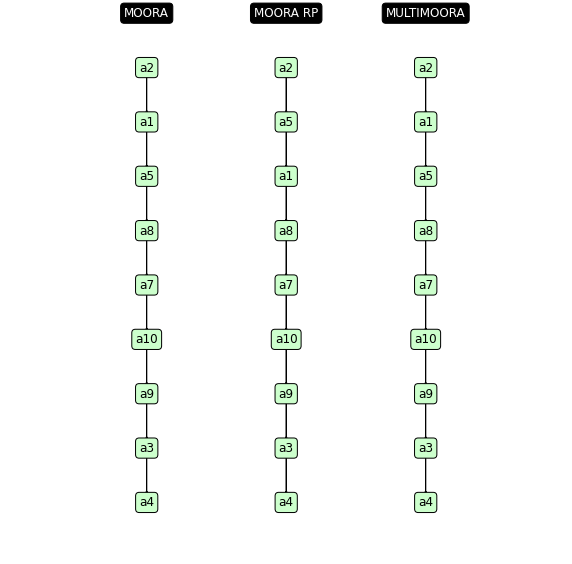

In [ ]:
from pyDecision.algorithm import multimoora_method

# Criterion Type: 'max' or 'min'
criterion_type = ['min', 'min', 'min', 'min', 'min', 'min', 'min']

# Dataset
dataset = decision_table11

# Ranking
fig = plt.figure(figsize = (10,10))
rank = multimoora_method(dataset, criterion_type, graph = True)

In [ ]:
multimoora_df = pd.DataFrame([3,2,9,10,4,1,6,5,8,7], index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR",
                                     "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"], columns = ["multimoora"])

*SAW*

In [ ]:
# Function: Rank 
def ranking(flow):    
    rank_xy = np.zeros((flow.shape[0], 2))
    for i in range(0, rank_xy.shape[0]):
        rank_xy[i, 0] = 0
        rank_xy[i, 1] = flow.shape[0]-i           
    for i in range(0, rank_xy.shape[0]):
        plt.text(rank_xy[i, 0],  rank_xy[i, 1], 'a' + str(int(flow[i,0])), size = 12, ha = 'center', va = 'center', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0.8, 1.0, 0.8),))
    for i in range(0, rank_xy.shape[0]-1):
        plt.arrow(rank_xy[i, 0], rank_xy[i, 1], rank_xy[i+1, 0] - rank_xy[i, 0], rank_xy[i+1, 1] - rank_xy[i, 1], head_width = 0.01, head_length = 0.2, overhang = 0.0, color = 'black', linewidth = 0.9, length_includes_head = True)
    axes = plt.gca()
    axes.set_xlim([-1, +1])
    ymin = np.amin(rank_xy[:,1])
    ymax = np.amax(rank_xy[:,1])
    if (ymin < ymax):
        axes.set_ylim([ymin, ymax])
    else:
        axes.set_ylim([ymin-1, ymax+1])
    plt.axis('off')
    plt.show() 
    return

# Function: SAW
def saw_method(dataset, criterion_type, weights, graph = True):
    X = np.copy(dataset)/1.0
    for i in range(0, X.shape[1]):
        if ( criterion_type[i] == 'max'):
            X[:,i] = (X[:,i] / np.max(X[:,i]))*weights[i]
        else:
            X[:,i] = (np.min(X[:,i]) / X[:,i])*weights[i]
    Y    = np.sum(X, axis = 1)
    flow = np.copy(Y)
    flow = np.reshape(flow, (Y.shape[0], 1))
    flow = np.insert(flow, 0, list(range(1, Y.shape[0]+1)), axis = 1)
    for i in range(0, flow.shape[0]):
        print('a' + str(int(flow[i,0])) + ': ' + str(round(flow[i,1], 3))) 
    if (graph == True):
        flow = flow[np.argsort(flow[:, 1])]
        flow = flow[::-1]
        ranking(flow)
    return 

a1: 0.917
a2: 0.902
a3: 1.011
a4: 1.142
a5: 0.89
a6: 0.386
a7: 0.926
a8: 0.929
a9: 0.973
a10: 0.945


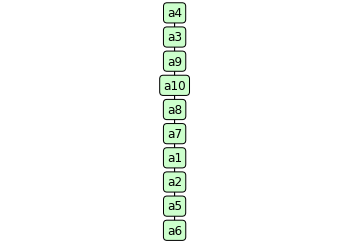

In [ ]:
# Dataset
dataset = decision_table11

##weights

weights = entropy_measure(dataset)

# Criterion Type: 'max' or 'min'
criterion_type = ['min', 'min', 'min', 'min', 'min', 'min', 'min']



# Ranking
rank = saw_method(dataset, criterion_type, weights, graph = True)

In [ ]:
saw_df = pd.DataFrame([7,8,2,1,9,10,6,5,3,4], index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR",
                                     "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"], columns = ["saw"])

*WASPAS*

In [ ]:
# Library
from pyDecision.algorithm import waspas_method


# Load Criterion Type: 'max' or 'min'
criterion_type = ['min', 'min', 'min', 'min', 'min', 'min', 'min']

# Dataset
dataset = decision_table11

# Weights
weights = entropy_measure(dataset)

# Lambda
lambda_value = 0.5

# Ranking

waspas = waspas_method(dataset, criterion_type, weights, lambda_value)

# Finalization
for i in range(0, 10):
  print('a'+str(i+1), waspas[0][i])

a1 1.858113862088753
a2 1.8369793051631331
a3 1.9723990214198124
a4 2.094450528952457
a5 1.7578549997191648
a6 0.9040252618729657
a7 1.8525748001762319
a8 1.8714676441144877
a9 1.9361779770915557
a10 1.8959567595699156


In [ ]:
waspas_df = pd.DataFrame([6,8,2,1,9,10,7,5,3,4], index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR",
                                     "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"], columns = ["waspas"])

# **Final Output**

In [ ]:
final_out = pd.concat([marcos_df.astype(int), topsis_df.astype(int), vikor_df.astype(int), multimoora_df, saw_df, waspas_df], axis = 1)

In [ ]:
final_out

,marcos,topsis,vikor,multimoora,saw,waspas
Linear Regression,7,7,4,3,7,6
LGBM,8,8,3,2,8,8
XGB,2,2,9,9,2,2
CATBoost,1,1,10,10,1,1
SGDR,9,9,2,4,9,9
KRR,10,10,1,1,10,10
ElasticNet,6,6,5,6,6,7
BayesianRidgeRegression,5,5,6,5,5,5
GBR,3,3,8,8,3,3
SVR,4,4,7,7,4,4


In [ ]:
mean_final_out = pd.DataFrame(final_out.values.mean(axis = 1).reshape(-1,1), index = ["Linear Regression", "LGBM", "XGB", "CATBoost", "SGDR",
                                     "KRR", "ElasticNet", "BayesianRidgeRegression", "GBR", "SVR"], columns = ["mean"])

In [ ]:
final_out1 = pd.concat([final_out, mean_final_out], axis = 1)

In [ ]:
final_out1

,marcos,topsis,vikor,multimoora,saw,waspas,mean
Linear Regression,7,7,4,3,7,6,5.666667
LGBM,8,8,3,2,8,8,6.166667
XGB,2,2,9,9,2,2,4.333333
CATBoost,1,1,10,10,1,1,4.000000
SGDR,9,9,2,4,9,9,7.000000
KRR,10,10,1,1,10,10,7.000000
ElasticNet,6,6,5,6,6,7,6.000000
BayesianRidgeRegression,5,5,6,5,5,5,5.166667
GBR,3,3,8,8,3,3,4.666667
SVR,4,4,7,7,4,4,5.000000


In [ ]:
from scipy import stats
x = final_out1.iloc[:,:-1]
y = final_out1.iloc[:,-1]
rho, pval = stats.spearmanr(x, y)

In [ ]:
pval_methods = pd.DataFrame(pval.mean(axis = 0).reshape(-1,1)[[j for j in range(0,6)]],
                            index = ["marcos", "topsis", "vikor", "multimoora", "saw", "waspas"],
                            columns = ["pval"])
pval_methods

,pval
marcos,0.000003
topsis,0.000003
vikor,0.000003
multimoora,0.000098
saw,0.000003
waspas,0.000029


In [ ]:
final_ranks = final_out1.iloc[:,[0]].sort_values(by = "marcos", ascending = True)
final_ranks

,marcos
CATBoost,1
XGB,2
GBR,3
SVR,4
BayesianRidgeRegression,5
ElasticNet,6
Linear Regression,7
LGBM,8
SGDR,9
KRR,10
